In [1]:
import json
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from pymongo import MongoClient
import re

plt.style.use('ggplot')

In [2]:
# client = MongoClient('localhost', 27017)
# db = client['bigfoot_db']
# col = db['col']

In [3]:
# bigfoot_df = pd.read_json('data/bigfoot_first100records.json')
records = []
with open('data/bigfoot_data.json') as file:
    for i in file:
        records.append(json.loads(i))
        


In [4]:
bigfoot_df = pd.DataFrame(records)

In [5]:
soup = BeautifulSoup(bigfoot_df.iloc[10]['html'])

In [6]:
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//w3c//dtd html 4.0 transitional//en">
<html>
 <head>
  <meta content="IE=EmulateIE7" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="bigfoot, big foot, BigFoot, BFRO, Bigfoot research, sightings database, organizations, Organization, sightings, lists, locations, areas, reports, report, ape, apes, forest, giant, giants, monster, monsters, swamp, creek, Florida, Skunk Ape Florida Skuk Ape, Abominable Snowman, Agogwe, Almasti, Batutut-Borneo, Didi, Dwendi, Kakundakari, Kung-Lu, Mapinguary, Muhalu, sasquatch, sasquach, Sedapa, Orang Pendek, Shiru, Sisimite, Skunk Ape, Tok- Burma, Yeti, Yowie, cryptozoology, animals, strange, glowing eyes, foot prints, cast, tracks, fottprint cast, hairy, beast, mystery, paranormal, ufo, x-files, xfiles, bionic woman, sightings, sighting, IVBC, Byrne, report, howl, scream, primate, everglades, Florida Everglades, swamp, Gigantopithecus, missing link, missing, lin

In [7]:
# split_strings = string.split('MONTH: ')
# split_strings[1]
# val = re.split("([A-Z][^A-Z]*)", split_strings[1])
# val[1]

In [8]:
soup = BeautifulSoup(bigfoot_df.iloc[3372]['html'])
string = soup.get_text()
string

"\n\n\n\n\nBFRO Report 12205: Late night sighting by motorists near GA/SC border\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xa0\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nGeographical Index > United States > South Carolina > Allendale County > Report # 12205\xa0\nReport # 12205\xa0\xa0(Class A)\n\nSubmitted  by  witness   on Thursday,\xa0July\xa028,\xa02005.\n\nLate night sighting by motorists near GA/SC border\n\n(Show Printer-friendly Version)\nYEAR: 2005\nSEASON: SummerMONTH: JulyDATE: 9thSTATE: South CarolinaCOUNTY: Allendale CountyLOCATION DETAILS: On rte 321 toward rte 301, near the SC/GA borderNEAREST TOWN: not sureNEAREST ROAD: rte 321OBSERVED: On July 9th we were driving from NYC through the Carolinas for a vacation with family members. While driving on 95 I missed my exit and continued on 95 til south of the border. We weren't sure if we missed our exit so we got

In [9]:
classes = ['YEAR: ', 'MONTH: ', 'SEASON: ', 'STATE: ']
cols = []
for i in range(len(bigfoot_df)):
    soup = BeautifulSoup(bigfoot_df.iloc[i]['html'])
    string = soup.get_text()
    vals = []
    for c in classes:
        if c in string:
            split_strings = string.split(c)
            if c == 'YEAR: ':
                val = split_strings[1].split('\n')
                try: 
                    val = int(val[0])
                    vals.append(val)
                except:
                    val = None
                    vals.append(val)
            else:
                if c == 'STATE: ':
                    val = re.split("([A-Z][^A-Z]*)", split_strings[1])
                    if val[1] in ['North ', 'South ', 'New ', 'West ', 'Rhode ']:
                        state = ''.join(val[1:4])
                        vals.append(state)
                    else: 
                        vals.append(val[1])
                else:
                    val = re.split("([A-Z][^A-Z]*)", split_strings[1])
                    vals.append(val[1])
        else:
            val = None
            vals.append(val)
    cols.append(vals)

In [10]:
ymss = pd.DataFrame(cols, columns=['year', 'month', 'season', 'state'])

In [11]:
ymss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857 entries, 0 to 4856
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    4427 non-null   float64
 1   month   4181 non-null   object 
 2   season  4799 non-null   object 
 3   state   4540 non-null   object 
dtypes: float64(1), object(3)
memory usage: 151.9+ KB


In [12]:
ymss['obs'] = 1
num_per_state = ymss.groupby('state').count()
num_per_month = ymss.groupby('month').count()
num_per_season = ymss.groupby('season').count()

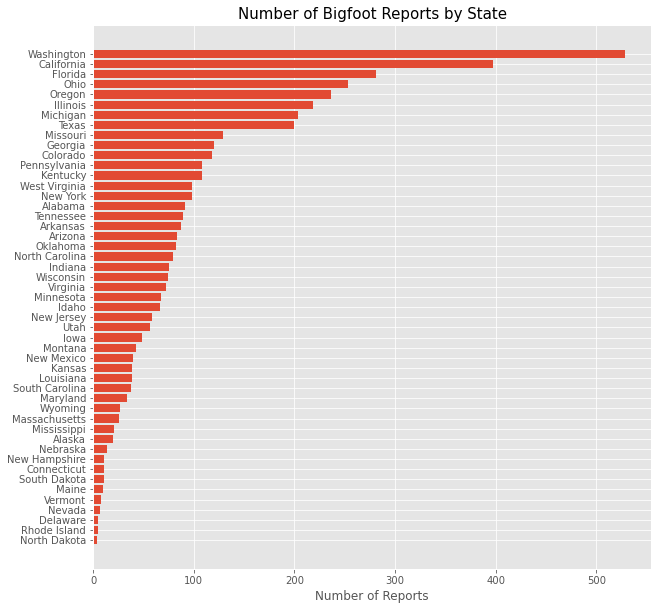

In [13]:
num_per_state.sort_values('obs', inplace=True)
x = num_per_state.index
y = num_per_state['obs']
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(x, y)
ax.set_title('Number of Bigfoot Reports by State', size=15)
ax.set_xlabel('Number of Reports')

fig.savefig('images/reports_by_state.png', bbox_inches = "tight")

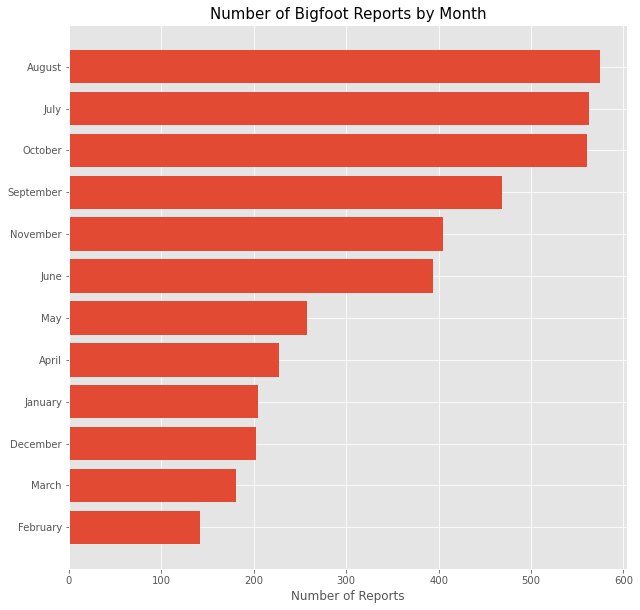

In [14]:
num_per_month.sort_values('obs', inplace=True)
x = num_per_month.index
y = num_per_month['obs']
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(x, y)
ax.set_title('Number of Bigfoot Reports by Month', size=15)
ax.set_xlabel('Number of Reports')

fig.savefig('images/reports_by_month.png', bbox_inches = "tight")

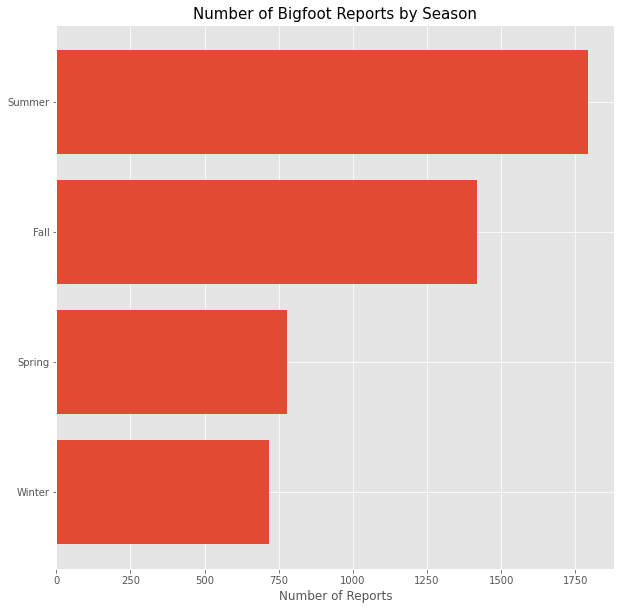

In [15]:
num_per_season = num_per_season.drop('Unknown')
num_per_season.sort_values('obs', inplace=True)
x = num_per_season.index
y = num_per_season['obs']
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(x, y)
ax.set_title('Number of Bigfoot Reports by Season', size=15)
ax.set_xlabel('Number of Reports')

fig.savefig('images/reports_by_season.png', bbox_inches = "tight")

In [16]:
land_area = pd.read_csv('data/State_Land_Area.csv')
land_area.set_index('state')

,sq_mi
state,
Alabama,50750
Alaska,570641
Arizona,113642
Arkansas,52075
California,155973
Colorado,103730
Connecticut,4845
Delaware,1955
Florida,53997


In [73]:
land_area.sort_values('sq_mi')

,state,sq_mi
38,Rhode Island,1034
7,Delaware,1955
6,Connecticut,4845
10,Hawaii,6423
29,New Jersey,7419
20,Massachusetts,7838
28,New Hampshire,8969
44,Vermont,9249
19,Maryland,9775
47,West Virginia,24087


In [17]:
states = num_per_state.merge(land_area, left_on='state', right_on='state')
col = states.columns
states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state   49 non-null     object
 1   year    49 non-null     int64 
 2   month   49 non-null     int64 
 3   season  49 non-null     int64 
 4   obs     49 non-null     int64 
 5   sq_mi   49 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.7+ KB


In [18]:
states['report_per_sqmile'] = states['obs']/(states['sq_mi']/1000)

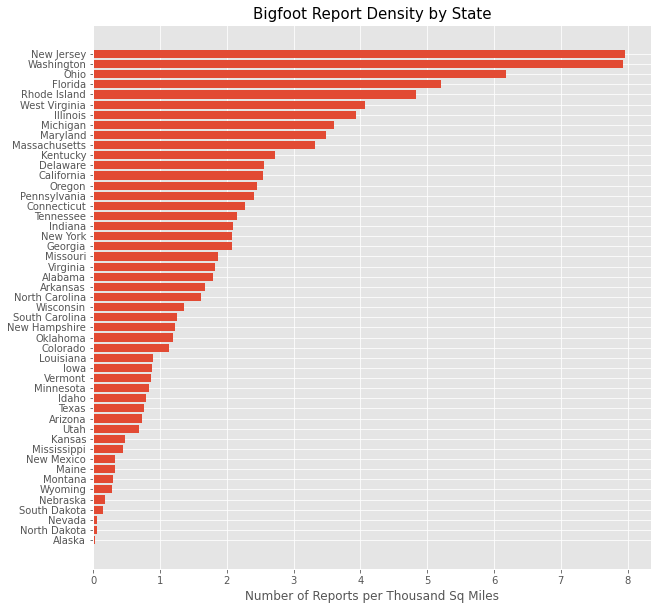

In [19]:
states.sort_values('report_per_sqmile', inplace=True)
x = states['state']
y = states['report_per_sqmile']
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(x, y)
ax.set_title('Bigfoot Report Density by State', size=15)
ax.set_xlabel('Number of Reports per Thousand Sq Miles')

fig.savefig('images/density_reports_by_state.png', bbox_inches = "tight")

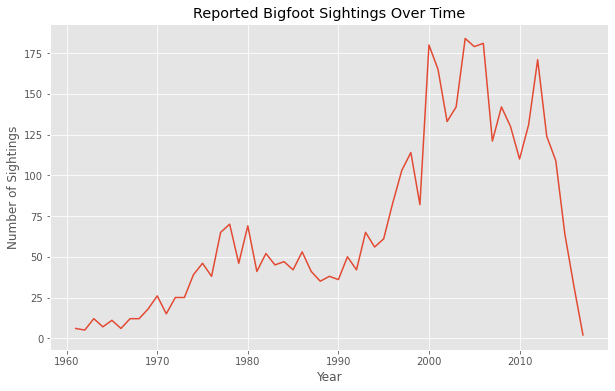

In [72]:
ymss = ymss[['year', 'month']]
ymss.sort_values('year', ascending=True)
ymss = ymss.dropna(axis=0, how='any')
ymss.reset_index(inplace=True)
ymss = ymss.drop(columns='index')
ymss = ymss[ymss['year'] > 1960]
year_count = ymss[['year', 'month']].groupby(['year']).agg(['count'])
num_sightings = year_count['month']
num_sightings.reset_index(inplace=True)
num_sightings.head()
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(num_sightings['year'], num_sightings['count'])
ax.set_title('Reported Bigfoot Sightings Over Time')
ax.set_ylabel('Number of Sightings')
ax.set_xlabel('Year')

fig.savefig('images/sightings_over_time.png', bbox_inches = "tight")

### NLP

In [20]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF

In [21]:
content = []
for i in range(len(bigfoot_df)):
    soup = BeautifulSoup(bigfoot_df.iloc[i]['html'])
    string = soup.get_text()
    content.append(string)

bigfoot_df['content'] = content


In [22]:
narratives = []
conditions = []
for doc in bigfoot_df['content']:
    if 'TIME AND CONDITIONS' in doc:
        split = doc.split('TIME AND CONDITIONS')
    else: 
        split = doc.split('ENVIRONMENT')
    try:
        narrative = split[0]
        narrative = narrative.replace('BFRO Report', '')
        condition_split = split[1].split('About BFRO Investigator')
        condition = condition_split[0]
    except:
        narrative = split[0]
        condition = ' '
    narratives.append(narrative)
    conditions.append(condition)

In [23]:
bigfoot_df['narrative'] = narratives
bigfoot_df['conditions'] = conditions

In [55]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopwords_ = set(stopwords.words('english'))
additional_stopwords = ('report', 'bfro', 'copyright', '1999', 
                        '2008', '2013', '2012', '2009', 'investigator', 
                        '2011','2007', '2006', '2015')
stopwords_ = stopwords_.union(additional_stopwords)

In [56]:
# tokens = [word_tokenize(thing) for thing in bigfoot_df['narrative']]

In [57]:
# lemmatizer = WordNetLemmatizer()
# tokens_lemmatize = [list(map(lemmatizer.lemmatize, sent)) for sent in tokens]

In [58]:
# tokens_lemmatize[0:100]

In [59]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words=stopwords_)
content_array_narrative = vectorizer.fit_transform(bigfoot_df['narrative'])
content_array_conditions = vectorizer.fit_transform(bigfoot_df['conditions'])
content_array = vectorizer.fit_transform(bigfoot_df['content'])

In [60]:
content_array_narrative = content_array_narrative.toarray()
content_array_narrative.shape

content_array_conditions = content_array_conditions.toarray()
content_array_conditions.shape

content_array = content_array.toarray()
content_array.shape

(4857, 5000)

In [61]:
content_mat_narrative = vectorizer.fit(bigfoot_df['narrative'])
words_narrative = content_mat_narrative.get_feature_names()

content_mat_conditions = vectorizer.fit(bigfoot_df['conditions'])
words_conditions = content_mat_conditions.get_feature_names()

content_mat = vectorizer.fit(bigfoot_df['content'])
words = content_mat.get_feature_names()

In [62]:
# for i in range(1,5):
#     nmf = NMF(n_components=i)
#     nmf.fit(content_array)
#     error = nmf.reconstruction_err_
#     print(f"{i}: {error}")

In [69]:
#6
nmf = NMF(n_components=8)
# nmf.fit(content_array)
W = nmf.fit_transform(content_array)
H = nmf.components_

In [70]:
indexes = np.argsort(H)[:,-1:-15:-1]

In [71]:
topic=0
for row in indexes:
    print(f"\n Topic {topic}")
    for idx in row:
        print(words[idx])
    topic +=1



 Topic 0
river
back
us
tree
could
would
like
see
deer
trail
one
area
got
hunting

 Topic 1
stan
courtney
illinois
animal
presentations
stancourtney
blog
travels
collected
audio
giving
special
recording
com

 Topic 2
heard
sound
lake
sounds
vocalizations
night
scream
loud
camp
tent
area
witness
sounded
hear

 Topic 3
tracks
snow
prints
track
found
footprints
print
inches
foot
area
toes
trail
footprint
road

 Topic 4
florida
expedition
michigan
expeditions
north
private
iowa
central
swamp
georgia
organizer
cathy
woods
possible

 Topic 5
house
window
woods
dogs
outside
night
dog
door
home
back
property
heard
said
yard

 Topic 6
road
creature
sighting
saw
witness
car
driving
animal
hair
highway
tall
side
arms
area

 Topic 7
island
vancouver
mcmillan
cc
british
blaine
lake
bc
manitoba
canada
sasquatch
rocks
columbia
reg
